In [14]:
from tensorflow.keras.datasets import mnist
import numpy as np
# SEED = 43
np.random.seed(32)
(X_train, _), (X_test, _) = mnist.load_data()

random_indices = np.random.choice(len(X_test), 5, replace=False)

# Question 1

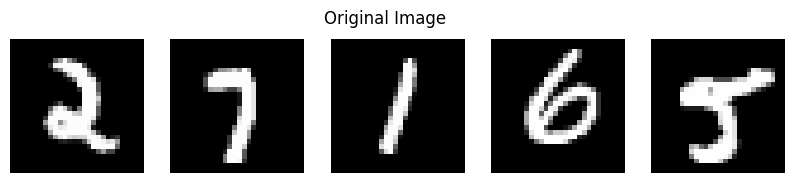

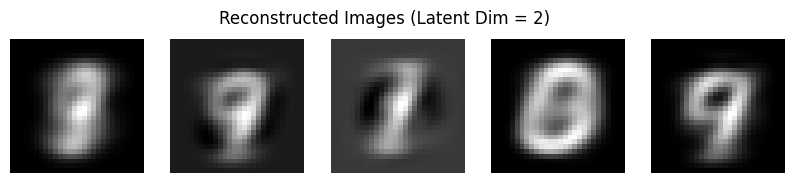

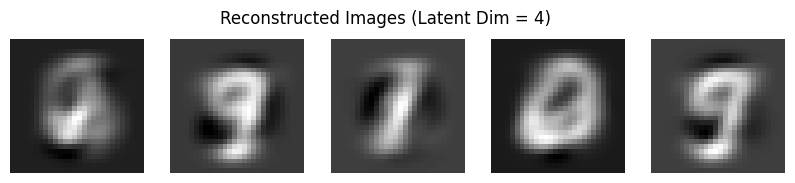

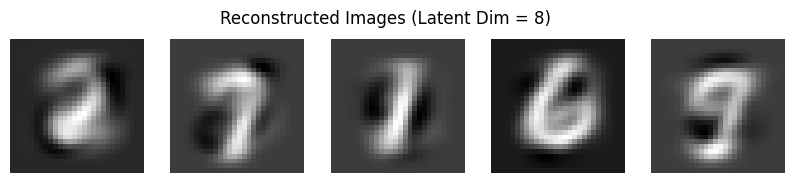

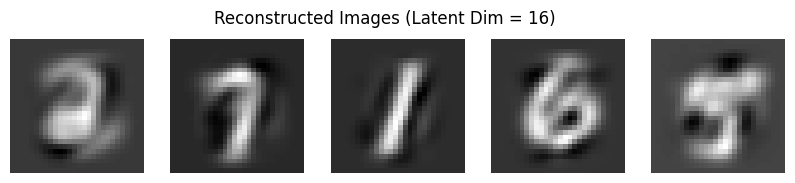

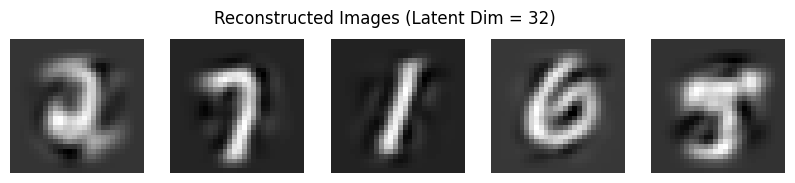

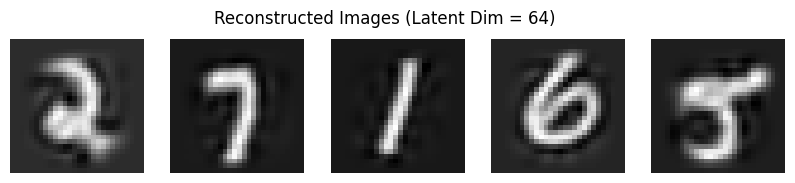

MSE for latent dimension 2: 0.08925432993359989
MSE for latent dimension 4: 0.06373499538875896
MSE for latent dimension 8: 0.06319104504729359
MSE for latent dimension 16: 0.0337113208274077
MSE for latent dimension 32: 0.025388395916332605
MSE for latent dimension 64: 0.013775541471876991


In [9]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist


# Load the MNIST dataset , _ for labels as we dont need them
(train_images, _), (test_images, _) = mnist.load_data()

# Flatten and normalize the images
train_images = train_images.reshape(-1, 28*28) / 255.0
test_images = test_images.reshape(-1, 28*28) / 255.0

# np.random.seed(SEED)
# random_indices = np.random.choice(len(test_images), size=5, replace=False)

# Define the dimensions of latent variables
latent_dims = [2, 4, 8, 16, 32, 64]

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images[random_indices[i]].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.suptitle(f'Original Image')
plt.show()

# Perform PCA for different latent dimensions
mse_values_pca = []
for dim in latent_dims:
    # Initialize PCA
    pca = PCA(n_components=dim)

    # Fit PCA to training images
    pca.fit(train_images)

    # Reconstruct images using PCA
    reconstructed_images = pca.inverse_transform(pca.transform(test_images))

    mse = np.mean(np.square(test_images[random_indices[i]] - reconstructed_images[random_indices[i]]))
    mse_values_pca.append(mse)

    # Display some of the reconstructed images
    plt.figure(figsize=(10, 2))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(reconstructed_images[random_indices[i]].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.suptitle(f'Reconstructed Images (Latent Dim = {dim})')
    plt.show()

for dim, mse in zip(latent_dims, mse_values_pca):
    print(f"MSE for latent dimension {dim}: {mse}")

# Question 2

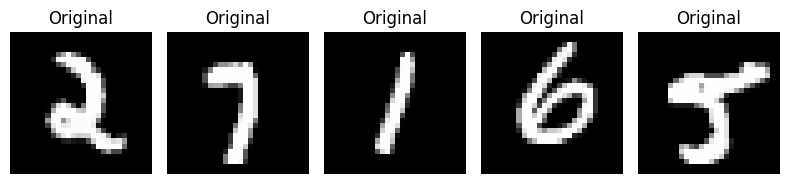

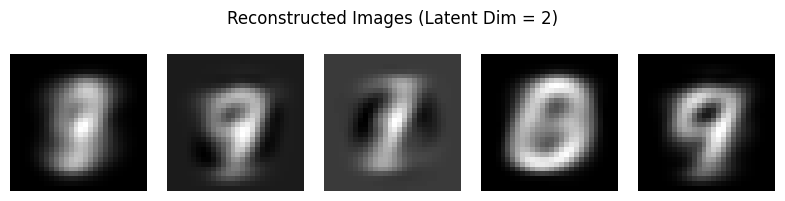

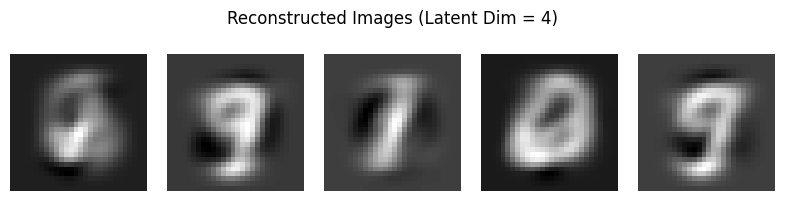

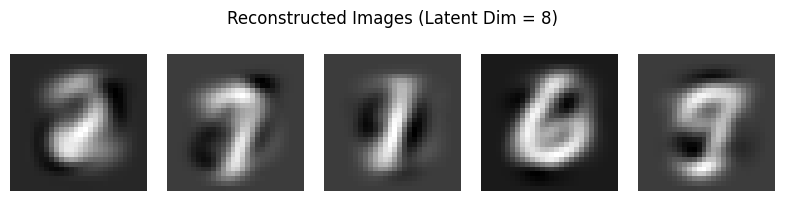

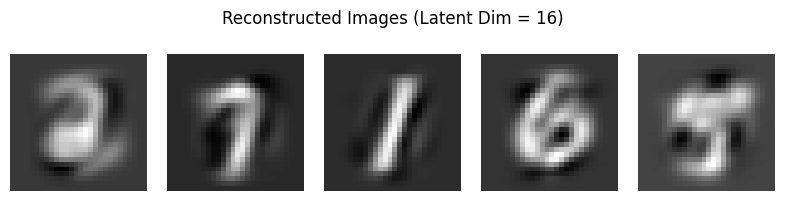

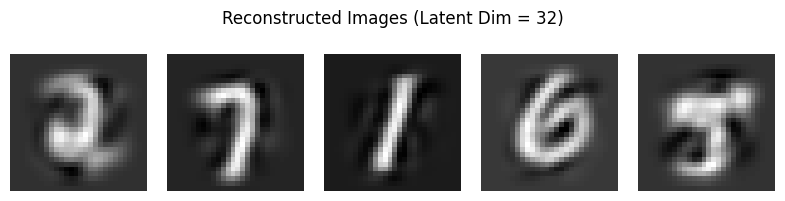

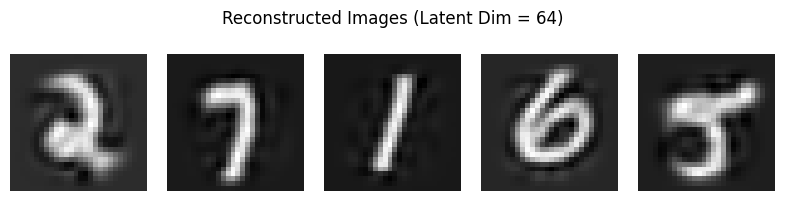

MSE values for each latent variable dimension:
Latent Dim: 2, MSE: 0.05567014079177112
Latent Dim: 4, MSE: 0.04790388209821149
Latent Dim: 8, MSE: 0.0374351769481818
Latent Dim: 16, MSE: 0.026860281330961407
Latent Dim: 32, MSE: 0.016827934144019598
Latent Dim: 64, MSE: 0.009046661731306874


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# np.random.seed(SEED)
# Define the Probabilistic PCA algorithm
class ProbabilisticPCA:
    def __init__(self, n_components, max_iter=50, tol=1e-5):
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X):
        # Data preprocessing
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        N, D = X.shape

        # Initialize parameters
        self.W = np.random.randn(D, self.n_components)
        self.sigma_sq = np.random.rand()

        # EM algorithm
        prev_likelihood = None
        for iter in range(self.max_iter):
            # E-step
            M = np.dot(self.W.T, self.W) + self.sigma_sq * np.eye(self.n_components)
            inv_M = np.linalg.inv(M)
            Z = np.dot(X_centered, np.dot(self.W, inv_M))

            # M-step
            self.W = np.dot(X_centered.T, Z) @ np.linalg.inv(np.dot(Z.T, Z))
            self.sigma_sq = np.mean(np.sum((X_centered - np.dot(Z, self.W.T))**2, axis=1)) / D

            # Compute likelihood
            likelihood = self.compute_likelihood(X_centered, Z, self.W, self.sigma_sq)
            if prev_likelihood is not None and abs(likelihood - prev_likelihood) < self.tol:
                break
            prev_likelihood = likelihood

    def transform(self, X):
        X_centered = X - self.mean
        M = np.dot(self.W.T, self.W) + self.sigma_sq * np.eye(self.n_components)
        inv_M = np.linalg.inv(M)
        Z = np.dot(X_centered, np.dot(self.W, inv_M))
        return Z

    def compute_likelihood(self, X, Z, W, sigma_sq):
        N, D = X.shape
        M = np.dot(W.T, W) + sigma_sq * np.eye(self.n_components)
        inv_M = np.linalg.inv(M)
        F = np.sum((X - np.dot(Z, W.T))**2) / sigma_sq
        log_det = np.sum(np.log(np.linalg.eigvals(M)))
        likelihood = -0.5 * (N * D * np.log(2 * np.pi) + N * log_det + F) / N
        return likelihood
    def inverse_transform(self, Z):
        X_reconstructed = np.dot(Z, self.W.T) + self.mean
        return X_reconstructed 

# Load the MNIST dataset
from tensorflow.keras.datasets import mnist
(X_train, _), (X_test, _) = mnist.load_data()

# Reshape the images
X_train = X_train.reshape(-1, 28 * 28) / 255.0
X_test = X_test.reshape(-1, 28 * 28) / 255.0
# np.random.seed(SEED)
# random_indices = np.random.choice(len(X_test), size=5, replace=False)


# Define the dimensions of latent variables
latent_dims = [2, 4, 8, 16, 32, 64]

# Define a function to calculate Mean Squared Error (MSE)
def calculate_mse(original, reconstructed):
    return np.mean(np.square(original - reconstructed))

# Print the 5 original images
fig, axes = plt.subplots(1, 5, figsize=(8,2))
for i in range(5):
    axes[i].imshow(X_test[random_indices[i]].reshape(28, 28), cmap='gray')  # Reshape each image to 28x28
    axes[i].set_title('Original')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# Print reconstructed images and MSE for each latent variable dimension
mse_values_ppca = []
for n_components in latent_dims:
    # Build the model
    ppca = ProbabilisticPCA(n_components)
    ppca.fit(X_train)

    # np.random.seed(SEED)
    # Transform test data and reconstruct images
    transformed = ppca.transform(X_test)
    reconstructed = ppca.inverse_transform(transformed)

    # Calculate MSE
    mse = calculate_mse(X_test, reconstructed)
    mse_values_ppca.append(mse)

    # Visualize the reconstructed images for all samples
    reconstructed_images = reconstructed.reshape(-1, 28, 28)

    fig, axes = plt.subplots(1, 5, figsize=(8,2))
    for i in range(5):
        axes[i].imshow(reconstructed_images[random_indices[i]], cmap='gray')
        axes[i].axis('off')
    plt.suptitle(f'Reconstructed Images (Latent Dim = {n_components})')
    plt.tight_layout()
    plt.show()

# Print MSE values for each latent variable dimension
print("MSE values for each latent variable dimension:")
for i, mse in enumerate(mse_values_ppca):
    print(f"Latent Dim: {latent_dims[i]}, MSE: {mse}")




# Question 3

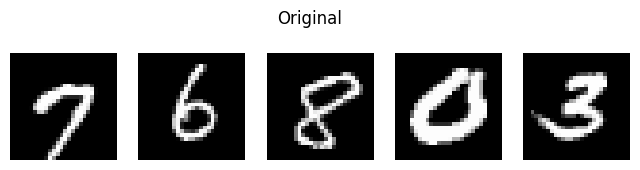

313/313 [==============================] - 3s 10ms/step


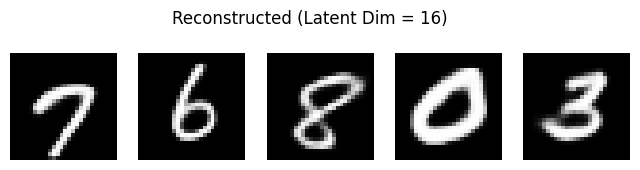

MSE for latent dimension 16: 0.007780970074236393


In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda, Reshape, Flatten, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load MNIST dataset
(train_images, _), (test_images, _) = tf.keras.datasets.mnist.load_data()

# Normalize images
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# train_images = train_images.reshape(-1, 28*28) / 255.0
# test_images = test_images.reshape(-1, 28*28) / 255.0
# train_images = np.expand_dims(train_images, axis=-1)
# test_images = np.expand_dims(test_images, axis=-1)

# Define VAE architecture
def build_vae(latent_dim):
    # Encoder
    inputs = Input(shape=(28, 28, 1))
    x = Conv2D(32, 3, activation='relu', strides=2, padding='same')(inputs)
    x = Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
    x = Flatten()(x)
    z_mean = Dense(latent_dim)(x)
    z_log_var = Dense(latent_dim)(x)

    # Reparameterization trick
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = tf.random.normal(tf.shape(z_mean))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

    z = Lambda(sampling)([z_mean, z_log_var])

    # Decoder
    decoder_input = Input(shape=(latent_dim,))
    x = Dense(7*7*64, activation='relu')(decoder_input)
    x = Reshape((7, 7, 64))(x)
    x = Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
    x = Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
    outputs = Conv2DTranspose(1, 3, activation='sigmoid', padding='same')(x)

    # Define models
    encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
    decoder = Model(decoder_input, outputs, name='decoder')
    vae_outputs = decoder(encoder(inputs)[2])
    vae = Model(inputs, vae_outputs, name='vae')

    return vae

# Define latent dimensions
latent_dims = [16]
# latent_dims = [2]


# Train and reconstruct for each latent dimension
mse_values = []
reconstructed_images_all = []

# np.random.seed(SEED)
# random_indices = np.random.choice(len(test_images), size=5, replace=False)

plt.figure(figsize=(8, 2))
for i in range(5):
    # Original Images
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images[random_indices[i]].reshape(28, 28), cmap='gray')
    
    plt.axis('off')
plt.suptitle("Original")    
plt.show()

for dim in latent_dims:
    # Build VAE model
    vae = build_vae(dim)

    # Compile and train VAE model
    vae.compile(optimizer=Adam(), loss='binary_crossentropy')
    vae.fit(train_images, train_images, epochs=5, batch_size=64, verbose=0)  # Reduced epochs and batch size

    # Randomly select 5 test images

    # random_test_images = test_images[random_indices]

    # Reconstruct test images
    reconstructed_images = vae.predict(test_images)

    # Calculate MSE
    mse_value = np.mean(np.square(test_images - reconstructed_images))
    mse_values.append(mse_value)
    # mse = np.mean(np.square(test_images[random_indices[i]] - reconstructed_images[random_indices[i]]))
    # mse_values.append(mse)

    # Plot original and reconstructed images for each latent dimension
    plt.figure(figsize=(8, 2))

    for i in range(5):

        # Reconstructed Images
        plt.subplot(1, 5, i+1)
        plt.imshow(reconstructed_images[random_indices[i]].reshape(28, 28), cmap='gray')
        
        plt.axis('off')
    plt.suptitle(f"Reconstructed (Latent Dim = {dim})")    
    plt.show()

    del vae
    del reconstructed_images
    del mse_value
    #del random_test_images


# Print MSE for each latent dimension
for dim, mse_value in zip(latent_dims, mse_values):
    print(f"MSE for latent dimension {dim}: {mse_value}")


# GRAPH FOR MSE VS LATENT DIMENSIONS

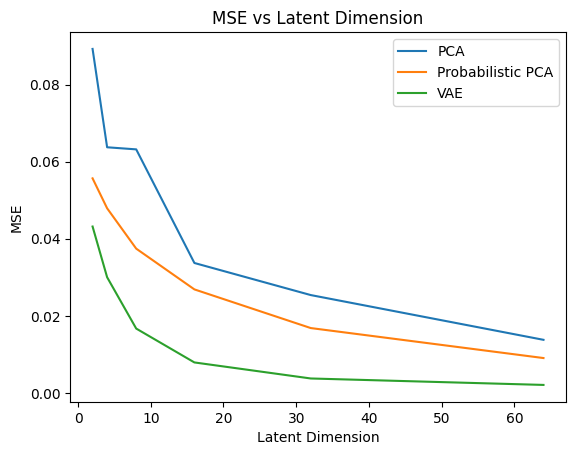

In [11]:
# plot mse values for PCA and VAE
plt.plot(latent_dims, mse_values_pca, label='PCA')
plt.plot(latent_dims, mse_values_ppca, label='Probabilistic PCA')
plt.plot(latent_dims, mse_values, label='VAE')
plt.xlabel('Latent Dimension')
plt.ylabel('MSE')
plt.title('MSE vs Latent Dimension')
plt.legend()
plt.show()